# 1. Import data

Here we import a shapefile that contains all the information for each NUTS3

In [1]:
import sys
sys.path.append(r"C:\Users\massaro\AppData\Roaming\Python\Python311\site-packages")
import geopandas as gpd
gdf = gpd.read_file('../Data/Shapefiles/20240627_APES FINAL_metric.shp')
gdf.head()

1.1.1


,NUTS_CO,NUTS_NA,RcrdTyp,Ttl_cs2,Forest,Shrub,Urban,Crop,Water,Other,...,gdp,incidnc,pop_dns,forest2,shrub2,crop2,urban2,water2,other2,geometry
0,AE,None,DENGUE,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,AE_MV_SA,None,ZIKV,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,AF,None,DENGUE,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,AG,None,CHIK,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,AG,None,DENGUE,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


# 2. Generate Figure 1

In [4]:
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# --- Projection ---
proj = ccrs.PlateCarree()  # simple lat/lon projection

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
bins = [0, 1, 10, 100, np.inf]
labels = [
    "0 < I ≤ 1",
    "1 < I ≤ 10",
    "10 < I ≤ 100",
    "I ≥ 100"
]

gdf['incidnc100'] = gdf['incidnc']*100000

# Create a categorical column
gdf['I_class'] = np.select(
    [
        gdf['incidnc100'] == 0,
        (gdf['incidnc100'] > 0) & (gdf['incidnc100'] <= 1),
        (gdf['incidnc100'] > 1) & (gdf['incidnc100'] <= 10),
        (gdf['incidnc100'] > 10) & (gdf['incidnc100'] <= 100),
        (gdf['incidnc100'] > 100)
    ],
    [
        "I = 0",
        "0 < I ≤ 1",
        "1 < I ≤ 10",
        "10 < I ≤ 100",
        "I ≥ 100"
    ],
    default="No data"
)

colors = {
    "I = 0": "whitesmoke",   # white
    "0 < I ≤ 1": "yellow",  # very light red
    "1 < I ≤ 10": "orange", # light red
    "10 < I ≤ 100": "red", # medium red
    "I ≥ 100": "black"   # dark red
}

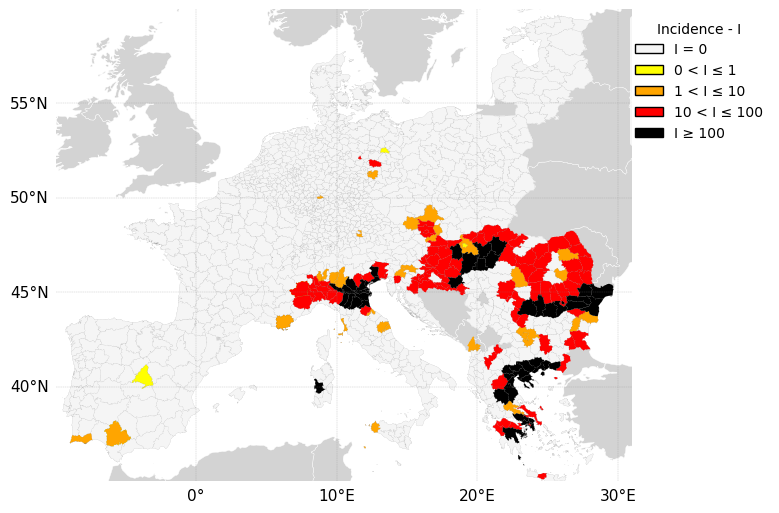

In [10]:
import pylab as plt
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': proj})
url = "../Data/Shapefiles/world-administrative-boundaries.zip"
world = gpd.read_file(url)
world.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.3, zorder=0)
gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=0.02, zorder=1)
for cat, color in colors.items():
    subset = gdf[gdf['I_class'] == cat]
    if not subset.empty:  # ✅ skip empty categories
        subset.plot(ax=ax, color=color, edgecolor='black', linewidth=0.02)


# Legend
patches = [mpatches.Patch(facecolor=color, label=cat, edgecolor='black') for cat, color in colors.items()] # Use facecolor instead of color
legend = plt.legend(handles=patches, title="Incidence - I", loc='upper right', bbox_to_anchor=(1.25, 1))
legend.get_frame().set_facecolor('white') # Set the legend background to white
legend.get_frame().set_edgecolor('none') # Remove legend border

# --- Style ---
ax.set_axis_off()
ax.set_xlim(-10, 31)
ax.set_ylim(35, 60)


# --- Add Cartopy gridlines ---
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 11}
gl.ylabel_style = {'size': 11}

plt.tight_layout()


In [11]:
# Save the figure in high resolution
fig.savefig('../Figures/Figure1.png', dpi=300, bbox_inches='tight')
fig.savefig('../Figures/Figure1.pdf', dpi=300, bbox_inches='tight')